<a href="https://colab.research.google.com/github/VikramHub27/Rough-Work/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

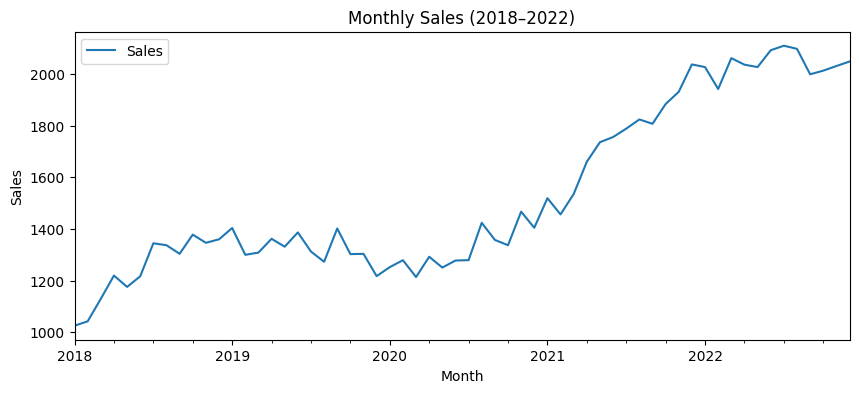

In [5]:
df = pd.read_csv('/content/sample_sales_data (1).csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.plot(title="Monthly Sales (2018–2022)", figsize=(10, 4))
plt.ylabel("Sales")
plt.show()

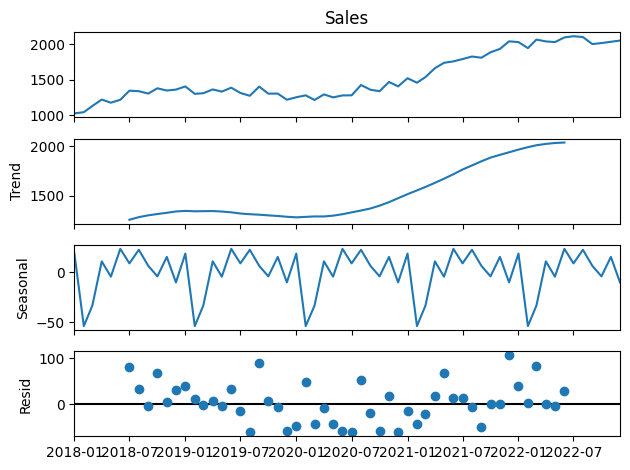

In [6]:
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


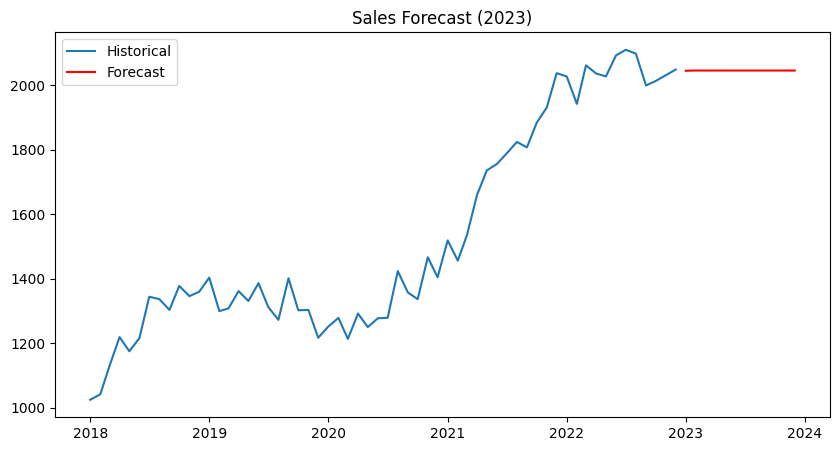

In [7]:
# Fit ARIMA model (you can auto-tune order using pmdarima's auto_arima)
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start='2023-01-01', periods=12, freq='MS')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Historical')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.title("Sales Forecast (2023)")
plt.legend()
plt.show()

In [8]:
# Simulate actual sales for 2023 to test accuracy
actual_2023 = forecast + np.random.normal(0, 50, 12)

mae = mean_absolute_error(actual_2023, forecast)
mape = mean_absolute_percentage_error(actual_2023, forecast) * 100

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

NameError: name 'np' is not defined

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np # Added import for numpy

# Simulate actual sales for 2023 to test accuracy
actual_2023 = forecast + np.random.normal(0, 50, 12)

mae = mean_absolute_error(actual_2023, forecast)
mape = mean_absolute_percentage_error(actual_2023, forecast) * 100

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 32.05
MAPE: 1.58%
